In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression

In [3]:
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
x

array([[-0.00667049, -0.31147413],
       [ 1.31844564, -0.64185347],
       [ 0.15266283, -0.02834447],
       ...,
       [ 0.74842727, -1.49728988],
       [ 0.16113817,  1.38259352],
       [ 2.13886138, -0.2515738 ]])

In [5]:
y

array([ -12.85165872,   94.52830793,   12.86202827,   48.62851127,
        -97.07416583,   17.53225371,   87.34559582,  -30.9211637 ,
        -66.26606044,  263.13115472,  255.1896251 ,  123.4591696 ,
        255.86381882,  -80.15564589,  -73.84863252,  -10.7471963 ,
        -71.20985775,   86.13547023,  -52.90547099,  -61.5132876 ,
        -40.81261643,  -99.78309628,   39.01881952,  123.20036398,
        -62.63601851, -127.63926333,  -72.92562452,   71.52187865,
         22.72899424,  -27.77746926,  -42.41554404,    9.7986248 ,
          8.97496321,  104.35082681,   73.59752902,  -53.21627625,
        123.77240165,  -54.56440693,   46.26359564, -157.04701168,
         20.08822002,   12.81555962,  145.81471314,  153.19339395,
        -59.42341217, -111.78818227,   81.13639148,  140.85952128,
        112.96336642,   71.74710157,   69.56553269,  -84.51449884,
        -26.45345037,  176.3706772 ,   83.64884381,   40.09793616,
       -145.6629584 ,   -9.78594562,   98.80055927,  -54.58850

<Axes: xlabel='0', ylabel='1'>

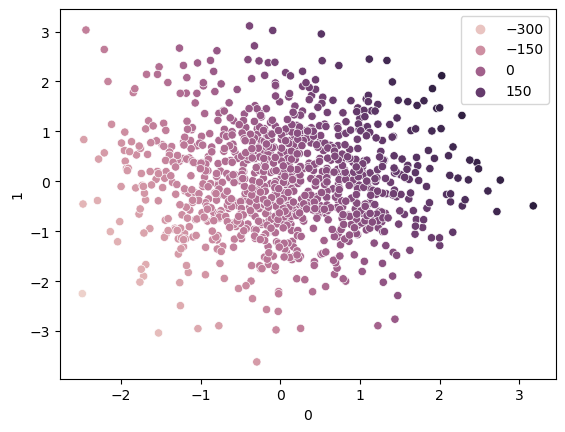

In [6]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [12]:
y_pred=svr.predict(x_test)

In [13]:
y_pred

array([-169.58599799, -176.48109475,  -36.38356527,  -63.74216653,
        -10.30724597,  -79.50924111,   96.97825721,   25.65187722,
        128.6376241 ,   75.82057635,    1.73755407,   83.09806067,
       -121.91273123,   81.87323793,    2.84703016, -104.74900354,
         61.9922997 ,   64.62525805,   84.55171844,   33.50449834,
        138.38235367,  108.83715051,  107.66967104, -103.47389975,
        196.36863398,  -75.53092735,  177.36680479,   74.33427699,
         12.83085684, -207.49817827,  -14.20040837,  -48.26127684,
        115.17392075,  -95.51697788,   89.34983711,   55.74649925,
        128.04248426,  -80.17752928,  168.6869026 , -122.11523942,
        110.96055874,  124.53224676,   40.98912212,  -55.38205077,
        -92.62303171, -165.47288561,   -7.6310942 ,   15.00014539,
        114.70669894, -113.41622879,   67.03190391,   32.37720648,
        148.74235889, -168.78090965, -332.95021928,   45.67166143,
         -7.4380103 , -172.8640658 ,   36.38195888,   36.24452

In [14]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9990080758453742


### Hyperparameter Tuning Using gridsearch cv

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
parameters={
           'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['linear'],
           'epsilon':[0.1,0.2,0.3]
}

In [17]:
svr=SVR()

In [18]:
grid=GridSearchCV(svr,param_grid=parameters,cv=5,verbose=3,refit=True)

In [19]:
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.709 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.671 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.691 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.697 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.696 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.709 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.671 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.691 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.697 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.696 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [22]:
y_pred4=grid.predict(x_test)

In [23]:
y_pred4

array([-170.4018855 , -177.37740731,  -36.59555373,  -63.99234355,
        -10.40002631,  -79.95774766,   97.49780721,   25.7273869 ,
        129.21122402,   76.16398709,    1.70546288,   83.56526149,
       -122.53177892,   82.24965173,    2.81979066, -105.2768848 ,
         62.25671877,   64.96625897,   85.08488551,   33.71998956,
        139.146448  ,  109.38459962,  108.13838485, -104.1816144 ,
        197.4268284 ,  -75.89790297,  178.28434602,   74.68413492,
         12.84378287, -208.55671194,  -14.30776782,  -48.52641884,
        115.77420016,  -95.99759611,   89.83721559,   55.988382  ,
        128.71071843,  -80.60382829,  169.45891439, -122.81016551,
        111.52629998,  125.19705332,   41.1478129 ,  -55.62319901,
        -93.10441848, -166.31088694,   -7.72032141,   15.0343293 ,
        115.23884008, -113.98761596,   67.38178124,   32.51201052,
        149.46084575, -169.68115437, -334.6144501 ,   45.86515743,
         -7.49934746, -173.77823823,   36.551924  ,   36.40676

In [24]:
from sklearn.metrics import r2_score

In [25]:
print(r2_score(y_test,y_pred4))

0.9990519269627304
